# Central Limit Theorem Investigation

Author: Matthew K. MacLeod

## Goals

This tutorial has the following goals

* sample various distributions
   * poisson
   * exponential
   * power law
   * beta
   * gamma
* illustrate the central limit theorem

## Background

The central limit theorem states that a sum of random variables is itself a random variable and that this random variable will follow the normal (gaussian) distribution.

https://en.wikipedia.org/wiki/Central_limit_theorem

That means that **no matter which distribution we sample from**, eg from the exponential, poisson, binomial, 
or some mixture of the above, whatever..when we compare the resulting sums, ** they will be normally distributed**. This is one reason why this the CLT is amazing. 

The CLT is behind the resulting collection of beans in Galton's quincux.

https://en.wikipedia.org/wiki/Bean_machine



and can be very useful.



## Distributions

In [47]:
def make_bar(x, y):
    xs = [i + 0.1 for i, _ in enumerate(x)]
    plt.bar(xs, y)
    #plt.xticks([i+0.5 for i, _ in enumerate(x)], x, rotation='vertical')
    plt.show()

## Normal distribution

The gaussian distribution is defined by the mean and standard deviation, ($\mu$ and $\sigma$)

$f(x)= \frac{1}{\sigma\sqrt{2\pi}}\mathrm{exp}\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\}, \ x \in \mathbb{R}$

In [1]:
import math
import random
from collections import Counter
from __future__ import division  # this is tres important

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return(math.exp(-(x-mu)**2/2/sigma**2) / (sqrt_two_pi * sigma))

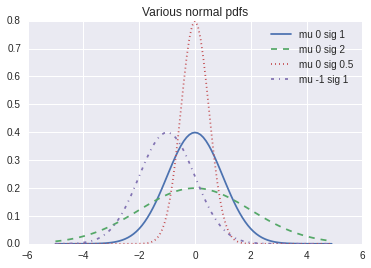

In [36]:
# get a feel for the normal distribution
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu 0 sig 1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu 0 sig 2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu 0 sig 0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu -1 sig 1')
plt.legend()
plt.title('Various normal pdfs')
plt.show()

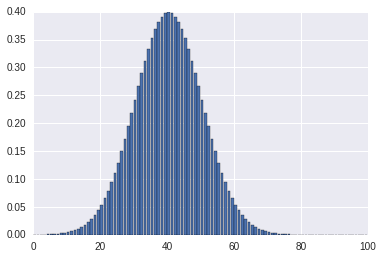

In [48]:
xs = [x/10.0 for x in range(-50,50)]
ys = [normal_pdf(x,mu=-1) for x in xs]
make_bar(xs, ys)

## Exponential distribution

"The exponential distribution is a continuous analogue of the geometric distribution. It describes many common
situations, such as the size of raindrops measured over many rainstorms, or the time between page requests to Wikipedia."

http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html#numpy.random.exponential


"Exponential variables can also be used to model situations where certain events occur with a constant probability per unit length, such as the distance between mutations on a DNA strand, or between roadkills on a given road."

https://en.wikipedia.org/wiki/Exponential_distribution



$f(x;\beta) = \frac{1}{\beta}e^{-x/\beta},\  x \geq 0$

sometimes written in terms of $\lambda$,

$f(x;\lambda) = \lambda e^{-\lambda x},\  x \geq 0$

The exponential distribution, is continuous and  **exhibits infinite divisibility**.

the theoretical mean is $\beta$, or in terms of $\lambda$,

$\mu = \frac{1}{\lambda}$

and the theoretical variance is $\beta^2$, 

$s^2 = \frac{1}{\lambda^2}$


In [14]:
def exponential_pdf(x, lamb=0.2):
    if x >= 0:
        return lamb * math.exp(-1*x*lamb)
    else:
        return 0.0

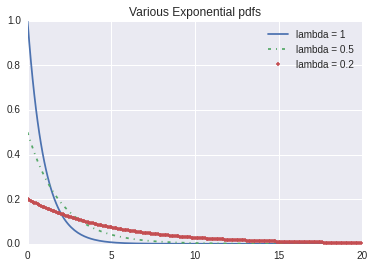

In [32]:
xs = [x/10.0 for x in range(0,200)]
plt.plot(xs,[exponential_pdf(x,1) for x in xs],'-', label='lambda = 1')
plt.plot(xs,[exponential_pdf(x,0.5) for x in xs],'-.', label='lambda = 0.5')
plt.plot(xs,[exponential_pdf(x,0.2) for x in xs],'.', label='lambda = 0.2')
plt.legend()
plt.title('Various Exponential pdfs')
plt.show()

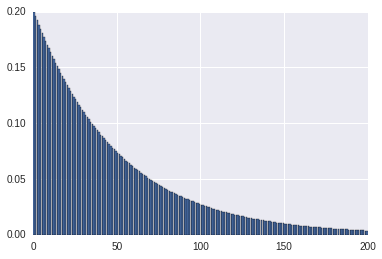

In [49]:
xs = [x/10.0 for x in range(0,200)]
ys = [exponential_pdf(x,0.2) for x in xs]
make_bar(xs,ys)

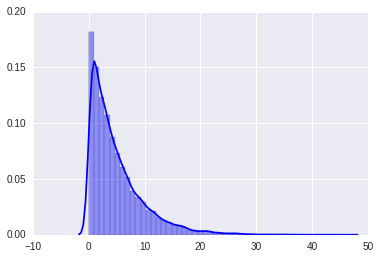

In [79]:
lamb = 0.2
n_sample = 20000
# note that np takes beta not lambda
exps = np.random.exponential(1/lamb, n_sample)
sns.distplot(exps, color="blue")

## Sample 50 means 

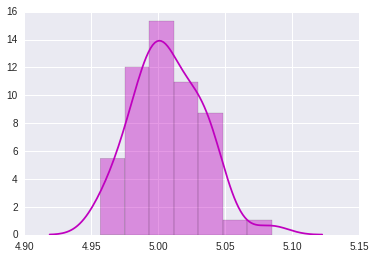

In [72]:
n_dist = 50
# take 50 means of a 1000 samples from exponential distributions
means = [np.random.exponential(1/lamb, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

## Now let's increase the number of random variable means

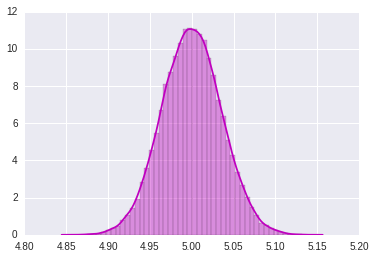

In [73]:
n_dist = 50000
# take n_dist means of n_sample samples from exponential distributions
means = [np.random.exponential(1/lamb, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

### Looks normal (gaussian)!

## Poisson distribution


The Poisson distribution is a **discrete** distribution and is the limit of the binomial distribution for large N.

good for rare events, 

https://en.wikipedia.org/wiki/Poisson_distribution

like traffic accidents or getting married:

$f(x;\lambda) = \frac{\lambda^x e^{-\lambda}}{x!}$

this is cool:

$\sum_{ x = 0}^{\infty} f(x) =  e^{-\lambda}\sum_{x=0}^{\infty} \frac{\lambda^x}{x!} = e^{-\lambda}e^{\lambda} = e^0 = 1$


the theoretical mean and the variance for the poisson distribution are both $\lambda$.

In [29]:
def poisson_pdf(x, lamb=0.2):
    if x >= 0:
        return (lamb**x * math.exp(-1*lamb))/ math.factorial(x)
    else:
        return 0.0

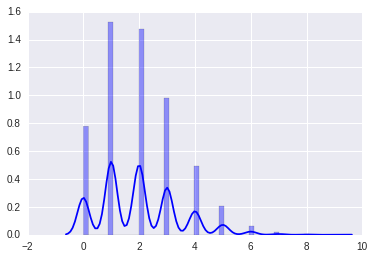

In [82]:
lamb = 2
n_sample = 20000
pp = np.random.poisson(lamb, n_sample)
sns.distplot(pp, color="blue")

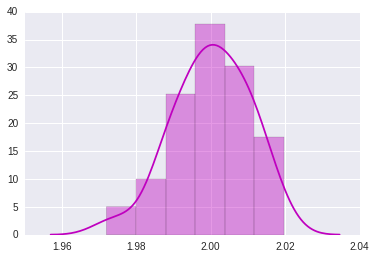

In [83]:
n_dist = 50
# take n_dist means of n_sample samples from poisson distributions
means = [np.random.poisson(lamb, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

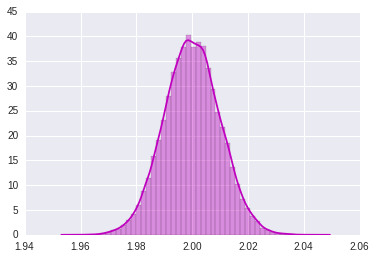

In [81]:
n_dist = 50000
# take n_dist means of n_sample samples from poisson distributions
means = [np.random.poisson(lamb, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

## Power-law distribution

An interesting distribution. The power function distribution is the inverse of the Pareto distribution and may also be seen as a special case of the Beta distribution. It is used,  in modeling the over-reporting of insurance claims, modeling earthquake magnitude and scale, and has many other uses.


https://en.wikipedia.org/w/index.php?title=Power_law&redirect=no


$f(x;a) = a x^{a-1} , 0 \leq x \leq 1, a > 0.$




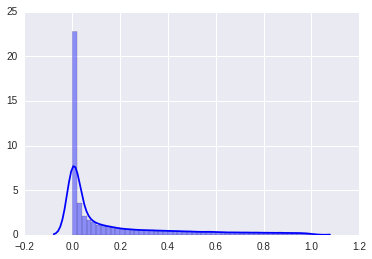

In [85]:
a = 0.2
n_sample = 20000
pp = np.random.power(a, n_sample)
sns.distplot(pp, color="blue")

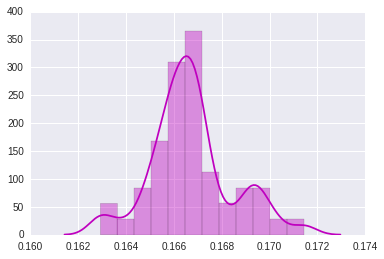

In [86]:
n_dist = 50
# take n_dist means of n_sample samples from power distributions
means = [np.random.power(a, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

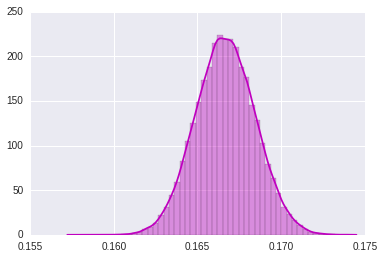

In [87]:
n_dist = 50000
# take n_dist means of n_sample samples from power distributions
means = [np.random.power(a, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

## Beta distribution


"The Beta distribution is a special case of the Dirichlet distribution, and is related to the Gamma distribution. It has the probability distribution function"

http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html#numpy.random.beta


$f(x;a,b) = \frac{1}{B(\alpha,\beta)}x^{\alpha-1}\left(1-x\right)^{\beta-1}$

where

$B(\alpha,\beta) = \int^1_0 t^{\alpha-1}(1-t)^{\beta-1} dt.$


The beta distribution is used in Bayesian inference, order statistics, 

"For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission. The beta distribution is a suitable model for the random behavior of percentages and proportions."

https://en.wikipedia.org/wiki/Beta_distribution


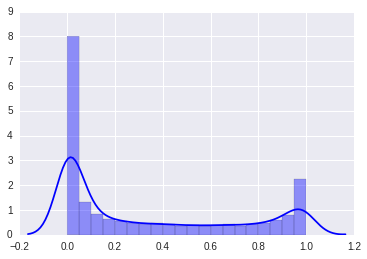

In [96]:
a, b = 0.2, 0.4
n_sample = 20000
pp = np.random.beta(a, b, n_sample)
sns.distplot(pp, color="blue")

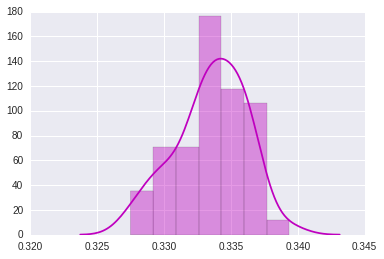

In [93]:
n_dist = 50
# take n_dist means of n_sample samples from beta distributions
means = [np.random.beta(a, b, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

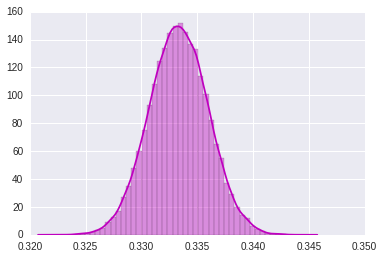

In [94]:
n_dist = 50000
# take n_dist means of n_sample samples from beta distributions
means = [np.random.beta(a, b, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

## Gamma distribution

http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.gamma.html#numpy.random.gamma


$f(x;k,\theta) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}$

where 

$\Gamma(k) = \int^{\infty}_0 x^{k-1}e^{-x}dx$

note that if $k$ is a positive integer, $n$:

$\Gamma(n) = (n-1)!$

"The parameterization with k and θ appears to be more common in econometrics and certain other applied fields, where e.g. the gamma distribution is frequently used to model waiting times. For instance, in life testing, the waiting time until death is a random variable that is frequently modeled with a gamma distribution."

https://en.wikipedia.org/wiki/Gamma_distribution


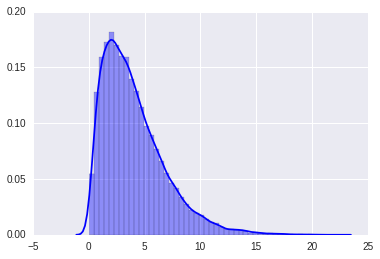

In [100]:
k, theta = 2., 2. # k is shape mean and theta is scale dispersion
n_sample = 20000
pp = np.random.gamma(k, theta, n_sample)
sns.distplot(pp, color="blue")

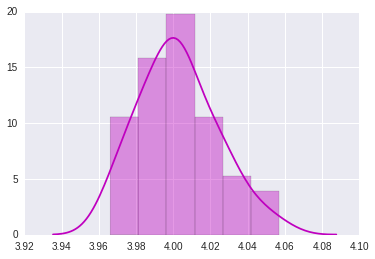

In [101]:
n_dist = 50
# take n_dist means of n_sample samples from gamma distributions
means = [np.random.gamma(k, theta, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

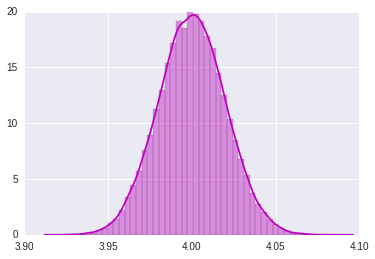

In [102]:
n_dist = 50000
# take n_dist means of n_sample samples from gamma distributions
means = [np.random.gamma(k, theta, n_sample).mean() for i in range(n_dist)]
sns.distplot(means, color="m")

## Summary

As illustrated in this notebook, the accumulated means of various distributions are normally distributed.



note see file mkm_notebooks/license.txt for license of this notebook.
